In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.feature_selection import mutual_info_classif

pd.plotting.register_matplotlib_converters()
%matplotlib inline

import duckdb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import precision_score, roc_auc_score, recall_score, accuracy_score

from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

%load_ext autoreload
%autoreload 2
from help_tool import help_tool, help_visuals, help_stats

pd.set_option('future.no_silent_downcasting', True)

# Setting graph parameters
sns.set_theme(style='whitegrid')
sns.set_palette('husl')

In [3]:
credit_card_balance = help_tool.csv_download(r'Archive\home-credit-default-risk\credit_card_balance.csv')
help_tool.first_look(credit_card_balance)

Dataset has 3840312 observations and 23 features
Columns with all empty values []
Dataset has 0 duplicates


,dtypes,"Null values, Count","Null values, %"
SK_ID_PREV,int64,0,0.0
SK_ID_CURR,int64,0,0.0
MONTHS_BALANCE,int64,0,0.0
AMT_BALANCE,float64,0,0.0
AMT_CREDIT_LIMIT_ACTUAL,int64,0,0.0
AMT_DRAWINGS_ATM_CURRENT,float64,749816,19.5
AMT_DRAWINGS_CURRENT,float64,0,0.0
AMT_DRAWINGS_OTHER_CURRENT,float64,749816,19.5
AMT_DRAWINGS_POS_CURRENT,float64,749816,19.5
AMT_INST_MIN_REGULARITY,float64,305236,7.9


In [5]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [11]:
credit_card_balance['SK_ID_PREV'].nunique()

104307

In [12]:
credit_card_balance['SK_ID_CURR'].nunique()

103558

MONTHS_BALANCE


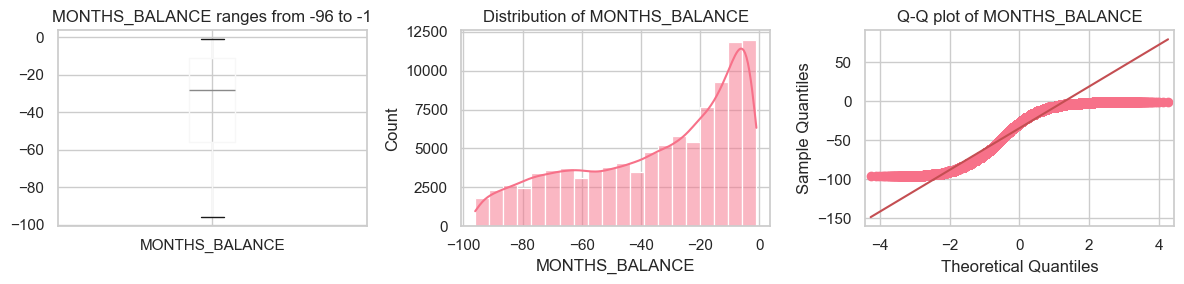

AMT_BALANCE


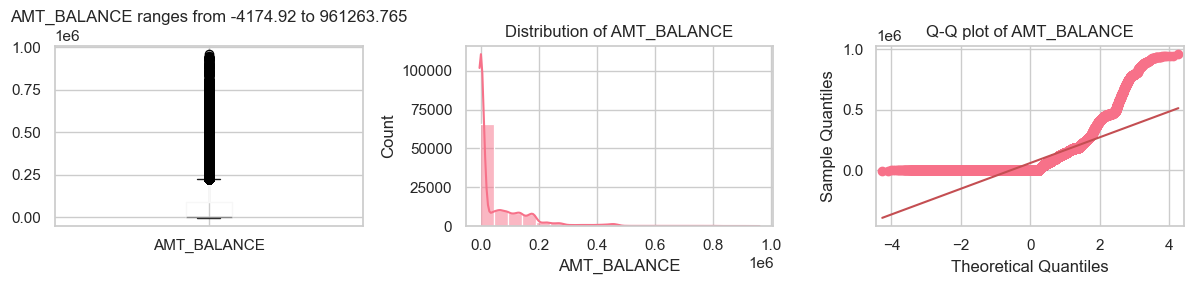

AMT_CREDIT_LIMIT_ACTUAL


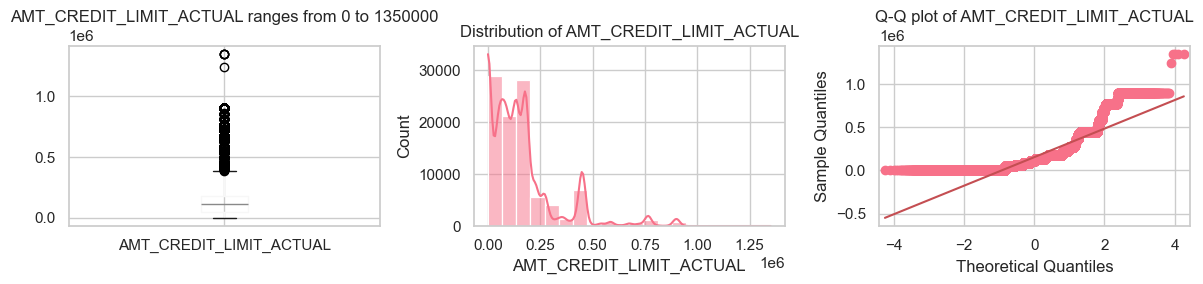

AMT_DRAWINGS_ATM_CURRENT


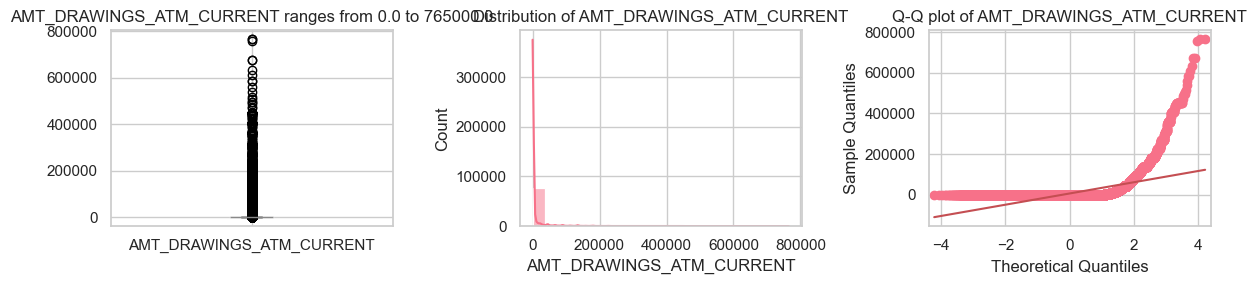

AMT_DRAWINGS_CURRENT


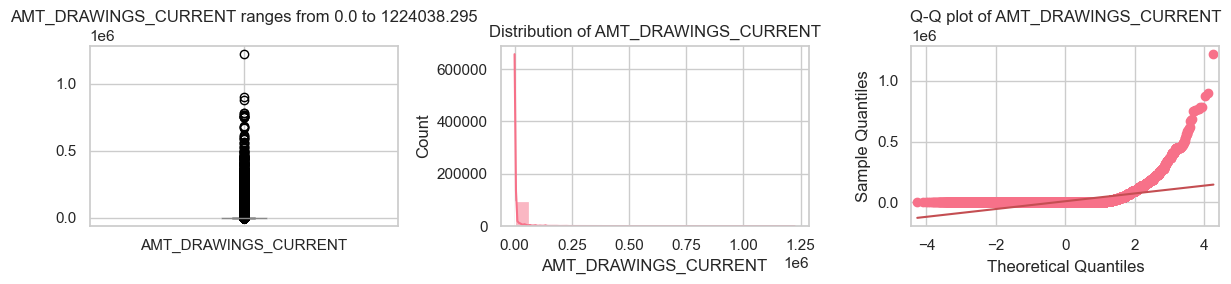

AMT_DRAWINGS_OTHER_CURRENT


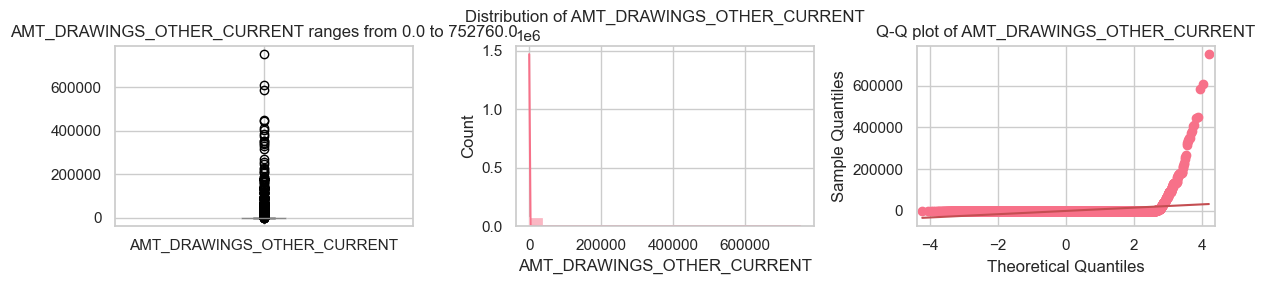

AMT_DRAWINGS_POS_CURRENT


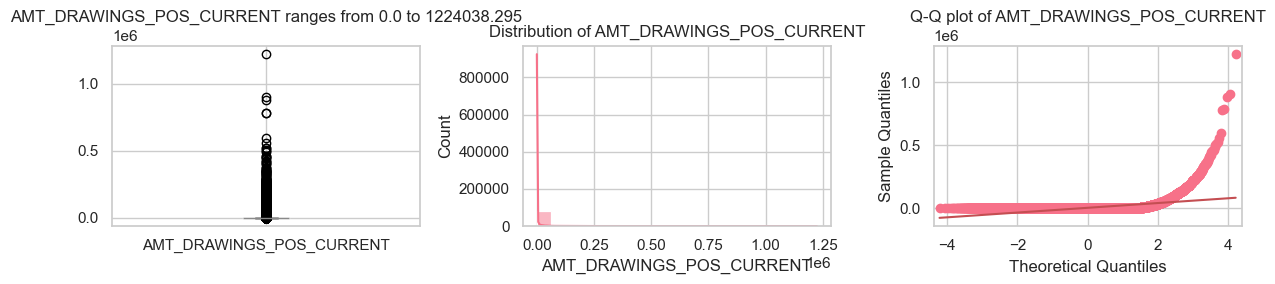

AMT_INST_MIN_REGULARITY


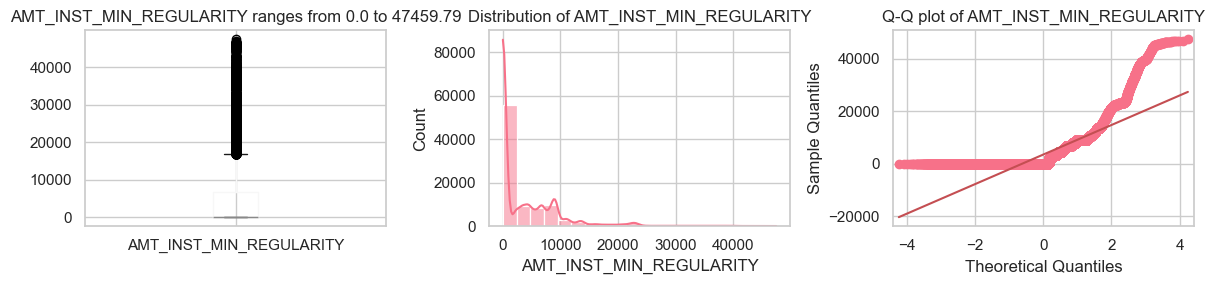

AMT_PAYMENT_CURRENT


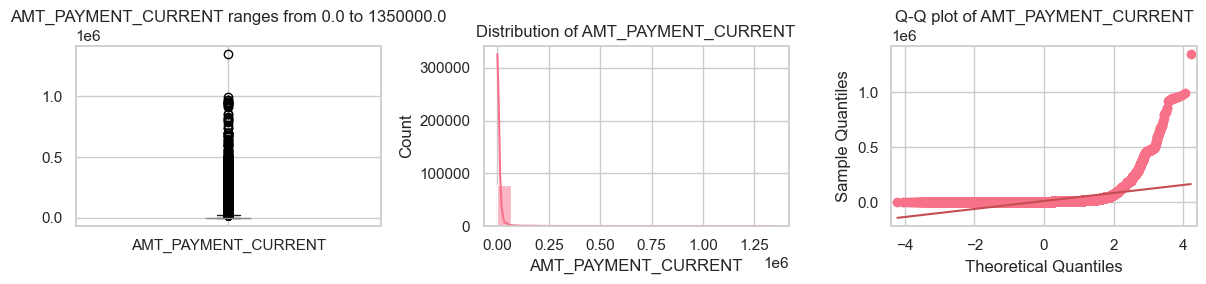

AMT_PAYMENT_TOTAL_CURRENT


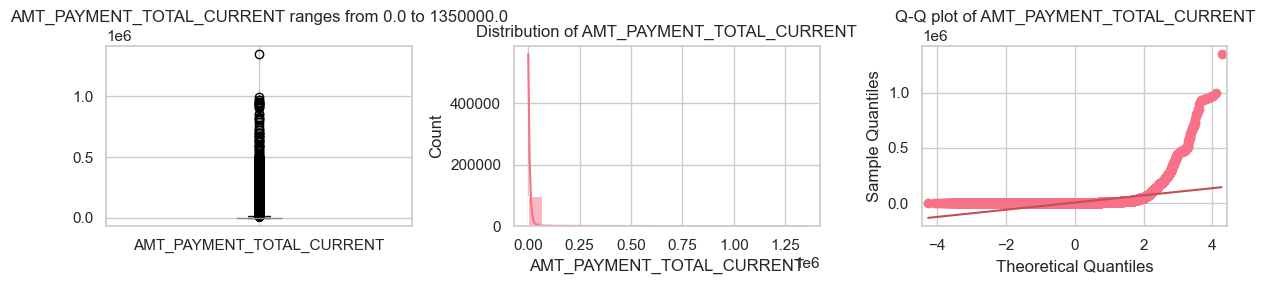

AMT_RECEIVABLE_PRINCIPAL


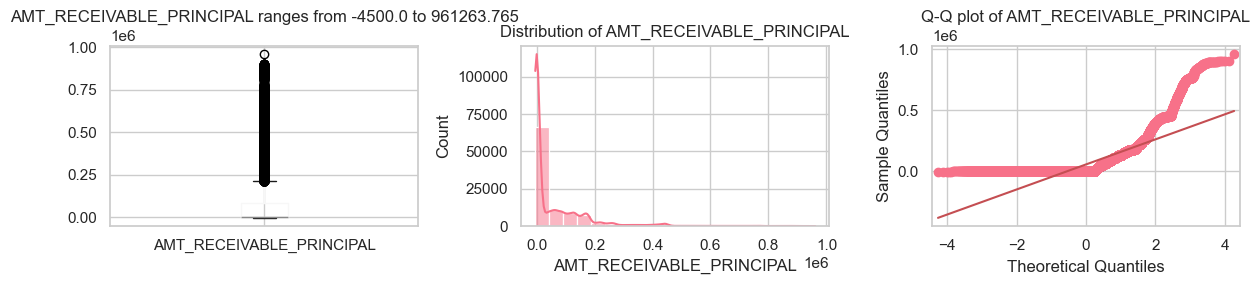

AMT_RECIVABLE


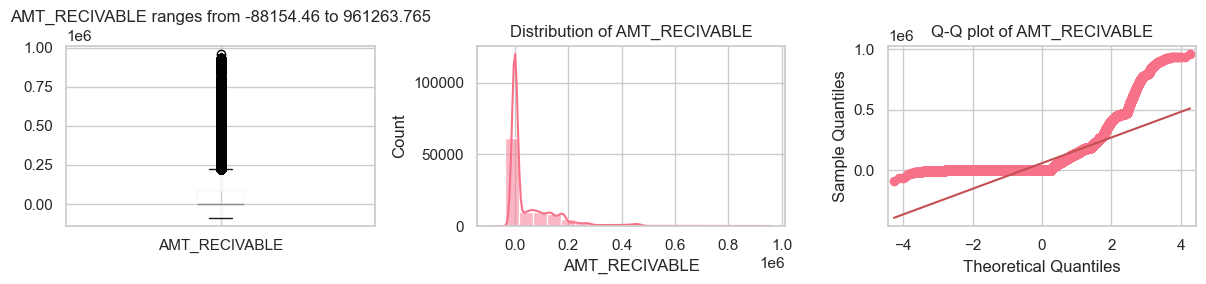

AMT_TOTAL_RECEIVABLE


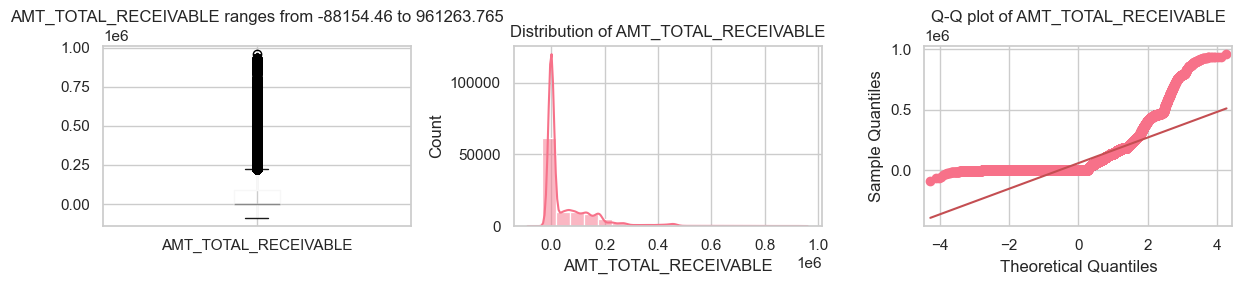

CNT_DRAWINGS_ATM_CURRENT


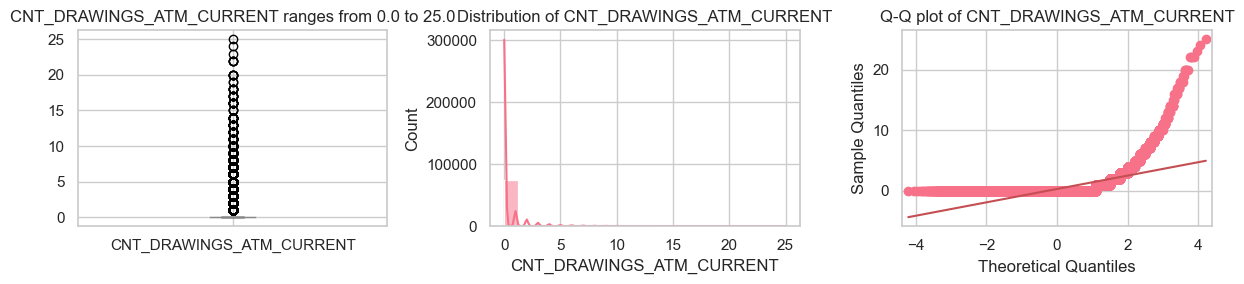

CNT_DRAWINGS_CURRENT


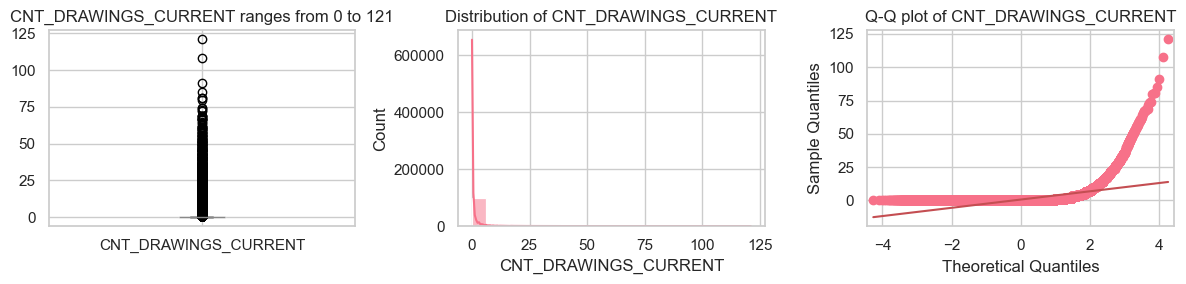

CNT_DRAWINGS_OTHER_CURRENT


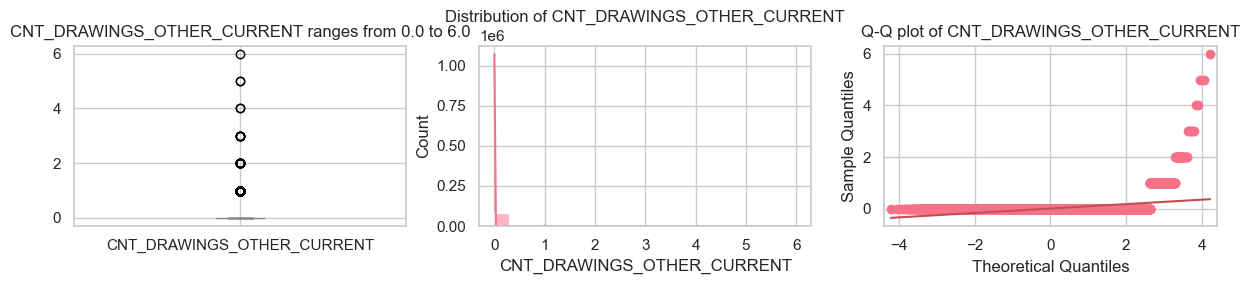

CNT_DRAWINGS_POS_CURRENT


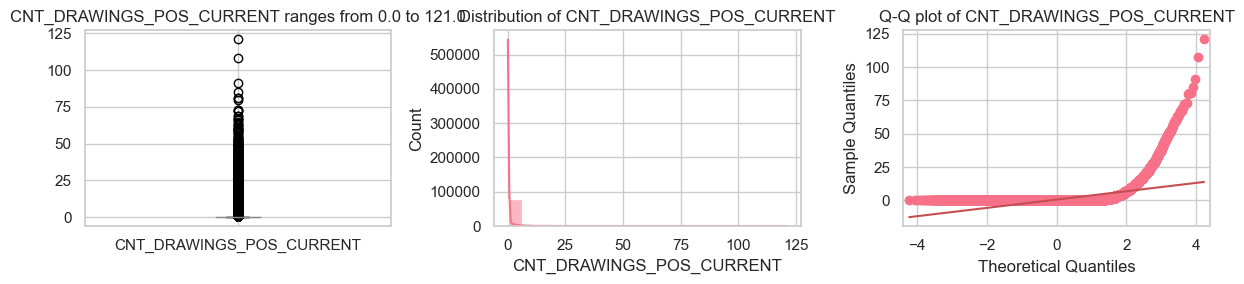

CNT_INSTALMENT_MATURE_CUM


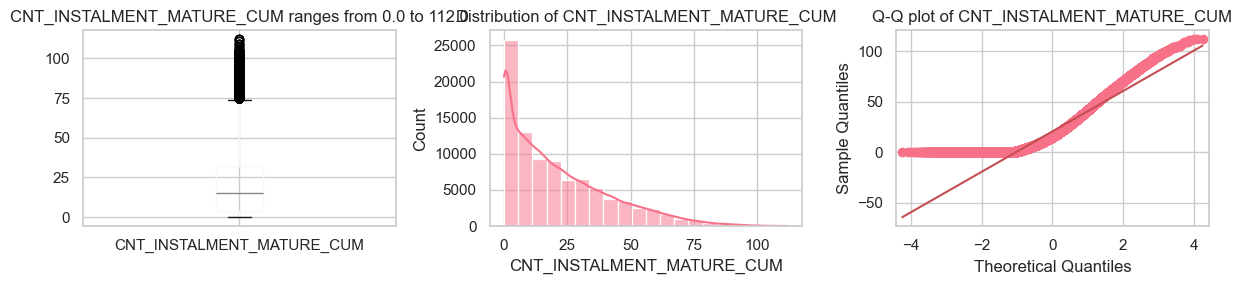

SK_DPD


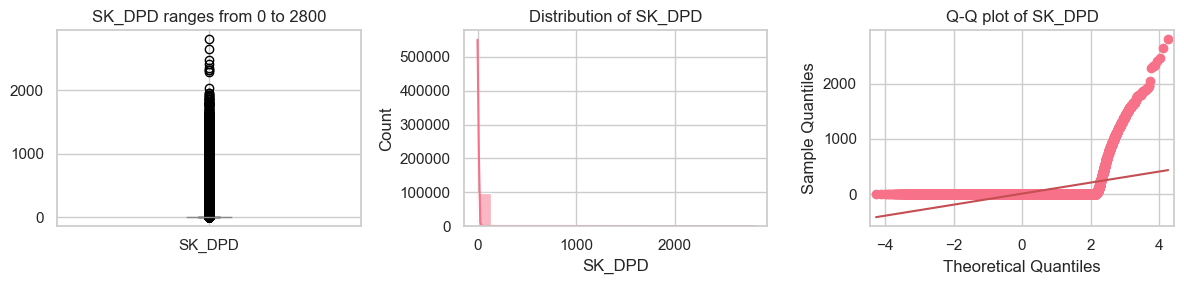

SK_DPD_DEF


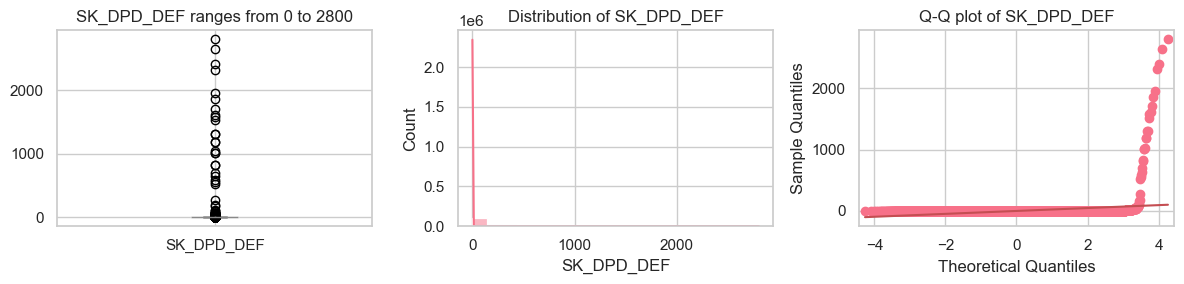

In [30]:
help_visuals.distribution_check(credit_card_balance.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).sample(100000, random_state=42))

Drawing amounts are related

In [16]:
credit_card_balance[credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].isna()][['AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT']].notna().sum()

AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
dtype: int64

In [18]:
credit_card_balance[credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].notna()][['AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT']].isna().sum()

AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
dtype: int64

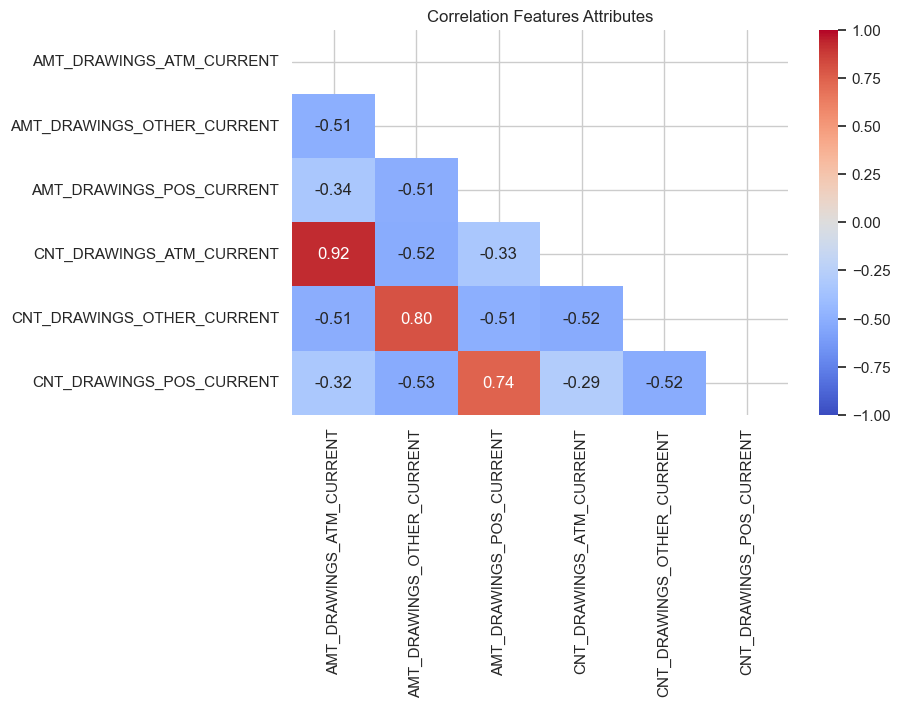

In [22]:
help_visuals.heatmap(credit_card_balance[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT']].corr(), 
                     'Features', 'pearson')

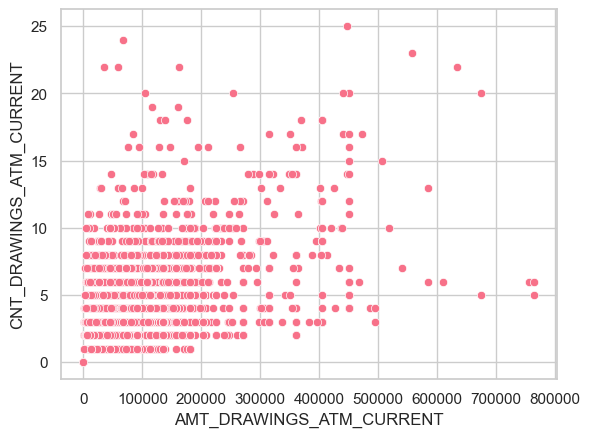

In [34]:
sns.scatterplot(credit_card_balance.sample(100000, random_state=42), x='AMT_DRAWINGS_ATM_CURRENT', y='CNT_DRAWINGS_ATM_CURRENT')
plt.show()

In [86]:
drawings = credit_card_balance.filter(like='_DRAWINGS_', axis=1).copy()

# Use the regex parameter to filter columns with regular expressions
amt_drawings = drawings.filter(regex='AMT_DRAWINGS_.*_CURRENT', axis=1)
cnt_drawings = drawings.filter(regex='CNT_DRAWINGS_.*_CURRENT', axis=1)

# Calculate the total amount and count of drawings
drawings.loc[:, 'AMT_Total'] = amt_drawings.sum(axis=1)
drawings.loc[:, 'CNT_Total'] = cnt_drawings.sum(axis=1)

Total drawing count aligns

In [83]:
drawings[drawings['CNT_Total'] != drawings['CNT_DRAWINGS_CURRENT']]

,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_Total,CNT_Total


But not the amounts

In [85]:
drawings[(round(drawings['AMT_Total'] - drawings['AMT_DRAWINGS_CURRENT'], 0) != 0)].filter(like='AMT_', axis=1)

,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_Total
53,0.0,2145.780,0.0,0.0,0.0
650,0.0,27003.645,0.0,0.0,0.0
847,0.0,12933.315,0.0,0.0,0.0
1595,0.0,2414.970,0.0,0.0,0.0
1964,0.0,1.350,0.0,0.0,0.0
...,...,...,...,...,...
3836041,0.0,5008.500,0.0,0.0,0.0
3837265,0.0,1118.835,0.0,0.0,0.0
3837553,0.0,17330.085,0.0,0.0,0.0
3839884,0.0,130.500,0.0,0.0,0.0


In [87]:
credit_card_balance.filter(like='AMT_', axis=1)

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE
0,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.00,1800.000,0.000,0.000,0.000
1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.00,2250.000,60175.080,64875.555,64875.555
2,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.00,2250.000,26926.425,31460.085,31460.085
3,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.00,11925.000,224949.285,233048.970,233048.970
4,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.00,27000.000,443044.395,453919.455,453919.455
...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,0.000,45000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000
3840308,0.000,45000,0.0,0.0,0.0,0.0,0.000,1879.11,0.000,0.000,0.000,0.000
3840309,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,375750.00,356994.675,269356.140,273093.975,273093.975
3840310,0.000,450000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000


In [96]:
credit_card_balance[round(credit_card_balance['AMT_TOTAL_RECEIVABLE'] - credit_card_balance['AMT_RECIVABLE'], 0) != 0][['AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'AMT_RECEIVABLE_PRINCIPAL']]

,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,AMT_RECEIVABLE_PRINCIPAL
1276,2231.775,2903.940,0.000
7366,131087.520,131210.415,125937.630
7400,68319.630,69264.630,63297.315
7625,112563.225,114138.225,107498.340
7628,18971.235,19916.235,17240.130
...,...,...,...
3831914,100968.480,106638.480,85936.140
3832651,84012.795,84957.795,79138.350
3832865,180574.200,203671.800,157476.600
3833764,141676.875,143566.875,130315.455


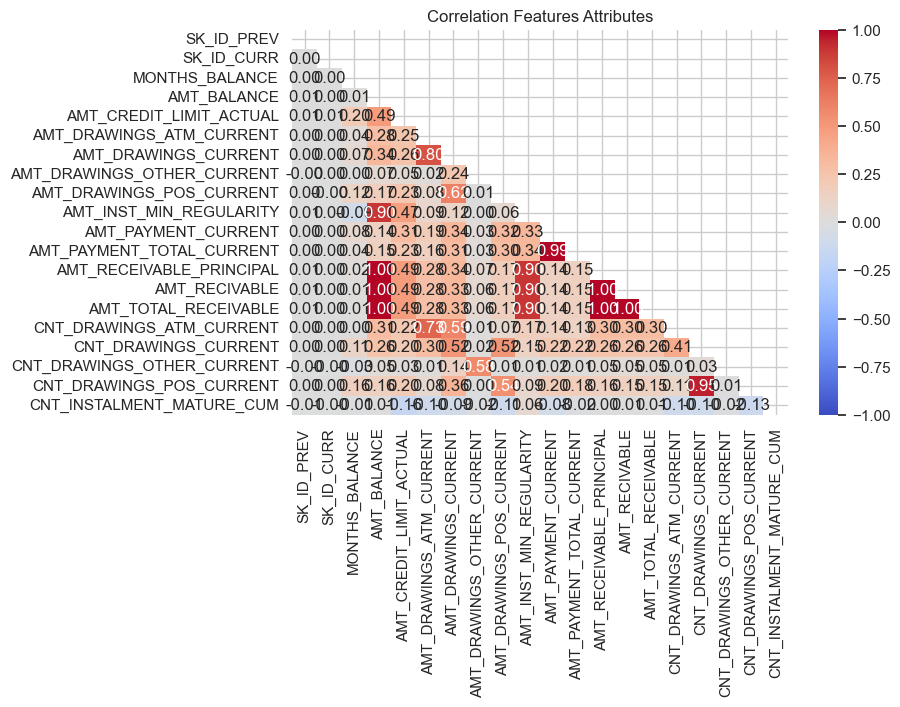

In [99]:
help_visuals.heatmap(credit_card_balance.drop(columns=['SK_DPD', 'SK_DPD_DEF', 'NAME_CONTRACT_STATUS']), 'Features', 'pearson')

In [100]:
credit_card_balance[['AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_BALANCE']]

,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,AMT_RECEIVABLE_PRINCIPAL,AMT_BALANCE
0,0.000,0.000,0.000,56.970
1,64875.555,64875.555,60175.080,63975.555
2,31460.085,31460.085,26926.425,31815.225
3,233048.970,233048.970,224949.285,236572.110
4,453919.455,453919.455,443044.395,453919.455
...,...,...,...,...
3840307,0.000,0.000,0.000,0.000
3840308,0.000,0.000,0.000,0.000
3840309,273093.975,273093.975,269356.140,275784.975
3840310,0.000,0.000,0.000,0.000


'SK_ID_CURR' == 363914

In [120]:
id_363914 = credit_card_balance[credit_card_balance['SK_ID_CURR'] == 363914].drop(columns=['NAME_CONTRACT_STATUS', 'SK_ID_PREV', 'SK_ID_CURR']).sort_values(by='MONTHS_BALANCE', ascending=False)
id_363914.var()

MONTHS_BALANCE                7.760000e+02
AMT_BALANCE                   7.080661e+08
AMT_CREDIT_LIMIT_ACTUAL       7.105263e+07
AMT_DRAWINGS_ATM_CURRENT      1.101541e+08
AMT_DRAWINGS_CURRENT          1.426229e+08
AMT_DRAWINGS_OTHER_CURRENT    0.000000e+00
AMT_DRAWINGS_POS_CURRENT      2.141806e+07
AMT_INST_MIN_REGULARITY       2.404106e+06
AMT_PAYMENT_CURRENT           6.392041e+07
AMT_PAYMENT_TOTAL_CURRENT     6.420004e+07
AMT_RECEIVABLE_PRINCIPAL      6.406855e+08
AMT_RECIVABLE                 7.108273e+08
AMT_TOTAL_RECEIVABLE          7.108273e+08
CNT_DRAWINGS_ATM_CURRENT      9.156798e-01
CNT_DRAWINGS_CURRENT          1.806579e+00
CNT_DRAWINGS_OTHER_CURRENT    0.000000e+00
CNT_DRAWINGS_POS_CURRENT      6.288377e-01
CNT_INSTALMENT_MATURE_CUM     3.720280e+02
SK_DPD                        1.041667e-02
SK_DPD_DEF                    1.041667e-02
dtype: float64

In [121]:
id_363914.drop(columns=['CNT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT'], inplace=True)

In [122]:
id_363914.head(10)

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
1,-1,63975.555,45000,2250.0,2250.000,0.000,2250.0,2250.000,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,69.0,0,0
2770281,-2,61124.625,45000,0.0,0.000,0.000,2250.0,2250.000,2250.0,58510.170,61799.625,61799.625,0.0,0,0.0,68.0,0,0
2170457,-3,61615.395,45000,0.0,0.000,0.000,2250.0,2250.000,2250.0,59101.200,62065.395,62065.395,0.0,0,0.0,67.0,0,0
2742589,-4,62129.475,45000,0.0,0.000,0.000,2250.0,4500.000,4500.0,59698.170,62354.475,62354.475,0.0,0,0.0,66.0,0,0
3016771,-5,64634.985,45000,0.0,0.000,0.000,2250.0,0.000,0.0,60301.170,64859.985,64859.985,0.0,0,0.0,65.0,1,1
3631371,-6,62856.405,45000,0.0,0.000,0.000,2250.0,4500.000,4500.0,60301.170,63081.405,63081.405,0.0,0,0.0,64.0,0,0
104903,-7,65159.235,45000,0.0,0.000,0.000,2250.0,2250.000,2250.0,60301.170,65609.235,65609.235,0.0,0,0.0,63.0,0,0
1540517,-8,65630.655,45000,62100.0,62100.000,0.000,2250.0,49500.000,49500.0,60301.170,65855.655,65855.655,3.0,3,0.0,62.0,0,0
1868390,-9,47476.170,45000,15750.0,47649.915,31899.915,2250.0,45000.000,45000.0,43922.655,47701.170,47701.170,2.0,7,5.0,61.0,0,0
818259,-10,41272.740,45000,6750.0,39313.755,32563.755,0.0,63.855,0.0,39249.900,41272.740,41272.740,1.0,7,6.0,60.0,0,0
